In [ ]:
# Verificar versión de Python y recursos disponibles
import sys
print("Versión de Python:", sys.version)

# Verificar GPU disponible (opcional)
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

Versión de Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
GPU disponible: []
Entorno configurado correctamente en Google Colab


Red neuronal simple con TensorFlow/Keras

In [16]:
# Cargar y preparar los datos
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

digits = load_digits()
X = digits.images
y = digits.target

# Preprocesamiento
X = X.reshape((X.shape[0], -1))  # 8x8 → 64
X = X / 16.0  # Normalizar
y_cat = to_categorical(y)

# División
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# Modelo DNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2420 - loss: 2.2635 - val_accuracy: 0.4792 - val_loss: 1.8490
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5792 - loss: 1.6951 - val_accuracy: 0.6979 - val_loss: 1.2626
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7999 - loss: 1.1217 - val_accuracy: 0.8160 - val_loss: 0.8190
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8662 - loss: 0.7227 - val_accuracy: 0.8403 - val_loss: 0.5820
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9101 - loss: 0.4845 - val_accuracy: 0.8681 - val_loss: 0.4504
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9289 - loss: 0.3733 - val_accuracy: 0.8819 - val_loss: 0.3704
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9591 - loss: 0.2798 - val_accuracy: 0.9097 - val_loss: 0.3313
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9484 - loss: 0.2439 - val_accuracy: 0.9201 - val_loss: 0.2947
Ep

Visualización del entrenamiento

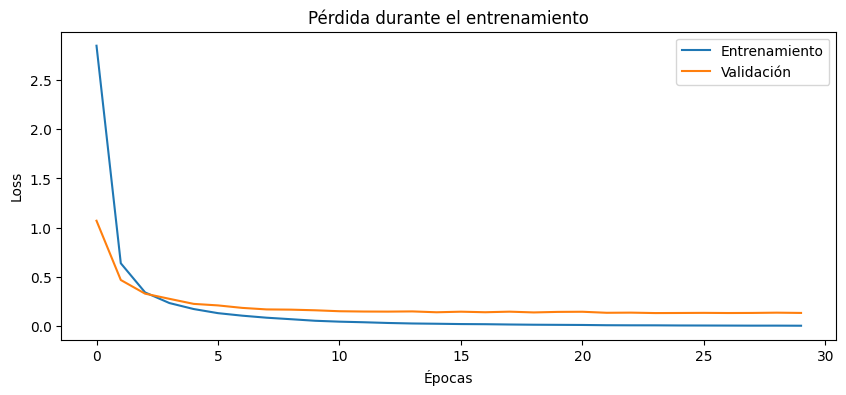

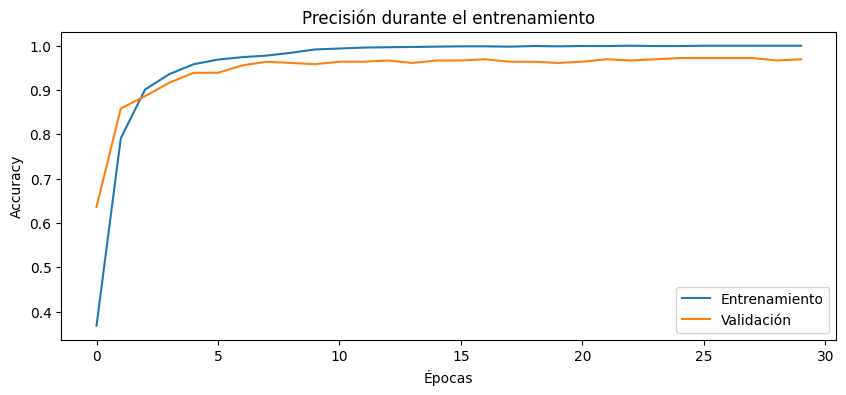

In [11]:
import matplotlib.pyplot as plt
import os

# Crear carpeta para el proyecto y subcarpeta images
project_folder = "04_Deep_Learning_Intro"
images_folder = os.path.join(project_folder, "images")
os.makedirs(images_folder, exist_ok=True)

# Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.savefig(os.path.join(images_folder, 'accuracy_plot.png'))
plt.show()

# Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig(os.path.join(images_folder, 'loss_plot.png'))
plt.show()

Evaluación del modelo

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


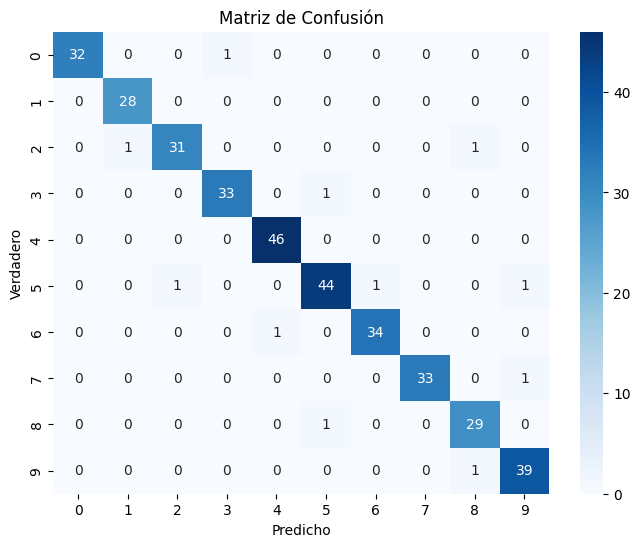

🔍 Accuracy : 0.9694
📉 MSE      : 0.2611
📊 MAE      : 0.0778
📈 R²       : 0.9662


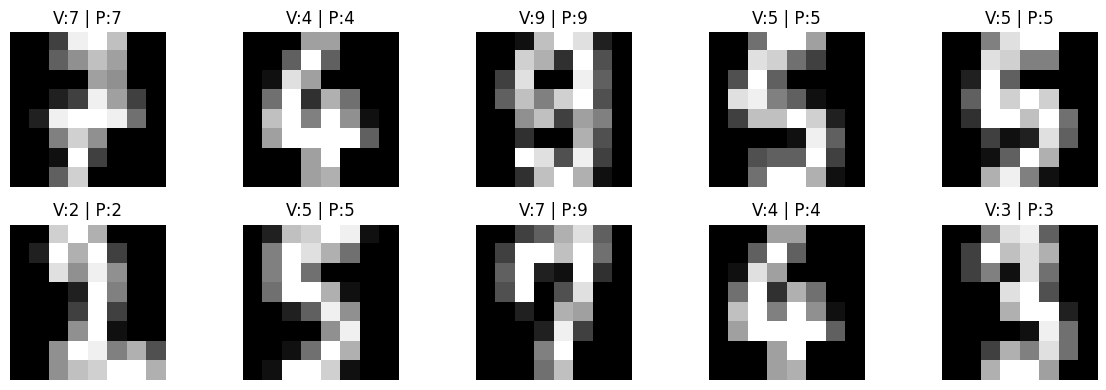

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns
import random

# Predicciones
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.savefig(os.path.join("04_Deep_Learning_Intro/images", "confusion_matrix.png"))
plt.show()

# Métricas
mse = mean_squared_error(y_test_labels, y_pred)
mae = mean_absolute_error(y_test_labels, y_pred)
r2 = r2_score(y_test_labels, y_pred)
accuracy = np.mean(y_test_labels == y_pred)

print(f"🔍 Accuracy : {accuracy:.4f}")
print(f"📉 MSE      : {mse:.4f}")
print(f"📊 MAE      : {mae:.4f}")
print(f"📈 R²       : {r2:.4f}")

# Clasificación aleatoria
plt.figure(figsize=(12, 4))
for i in range(10):
    index = random.randint(0, len(X_test)-1)
    img = X_test[index].reshape(8, 8) * 16
    true_label = y_test_labels[index]
    pred_label = y_pred[index]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"V:{true_label} | P:{pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.savefig(os.path.join("04_Deep_Learning_Intro/images", "predicciones_random.png"))
plt.show()

GitHub

🔐 Ingresa tu token de GitHub:··········
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/UEES-IA-Semana1-Grupo2
❌ El notebook no existe en /content/04_Deep_Learning_Intro.ipynb


FileNotFoundError: [Errno 2] No such file or directory: 'loss_curve.png'